# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [8]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns

# 設定 data_path
dir_data = '/Users/kuangtinghsiao/Documents/資料科學馬拉松/Part01-1/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [54]:
'''取出所有跟福點數有關的資料'''
float_type=[]
dtype=app_train.dtypes
column=app_train.columns
for i,j in enumerate(dtype):
    if j == 'float64':
        float_type.append(app_train.iloc[:,i])
float_type=pd.DataFrame(float_type)
float_type=float_type.T

In [74]:
'''剔除NAN的列'''
float_type.dropna().head()


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,103500.0,573628.5,24435.0,463500.0,0.009657,-341.0,22.0,2.0,0.270766,0.707126,...,1.0,2.0,1.0,-2053.0,0.0,0.0,0.0,0.0,0.0,3.0
124,202500.0,260725.5,16789.5,198000.0,0.018850,-762.0,8.0,2.0,0.647045,0.746486,...,0.0,6.0,0.0,-1782.0,0.0,0.0,0.0,0.0,0.0,3.0
143,175500.0,1293502.5,35568.0,1129500.0,0.018850,-8887.0,9.0,2.0,0.531106,0.646689,...,0.0,0.0,0.0,-396.0,0.0,0.0,0.0,0.0,0.0,2.0
152,202500.0,675000.0,53329.5,675000.0,0.031329,-180.0,4.0,2.0,0.674832,0.616156,...,0.0,0.0,0.0,-1792.0,0.0,0.0,0.0,1.0,0.0,4.0
161,162000.0,263686.5,24781.5,238500.0,0.022625,-464.0,3.0,2.0,0.534999,0.585859,...,0.0,5.0,0.0,-1161.0,0.0,0.0,0.0,0.0,0.0,3.0


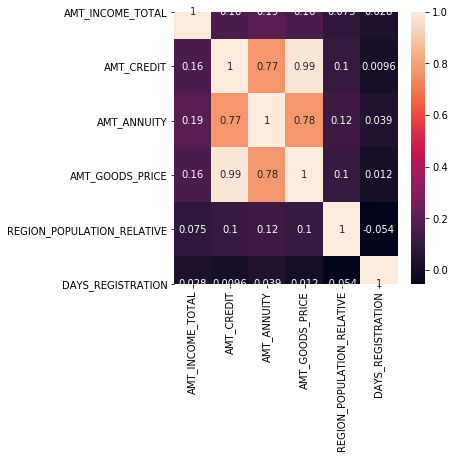

In [81]:
'''各欄位的相關係數熱度圖'''
plt.figure(figsize=(5,5))
sns.heatmap(float_type.iloc[:,0:6].corr(),annot=True)
plt.show()

MAX= 117000000.0
MIN= 25650.0
MEAN= 168797.9192969845


(-10, 600000)

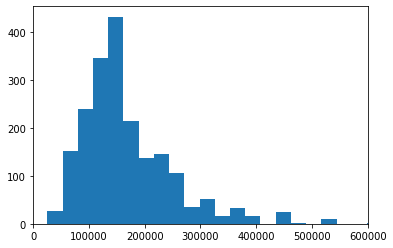

In [109]:
print('MAX=',app_train['AMT_INCOME_TOTAL'].max())
print("MIN=",app_train['AMT_INCOME_TOTAL'].min())
print('MEAN=',app_train['AMT_INCOME_TOTAL'].mean())
plt.hist(app_train['AMT_INCOME_TOTAL'][0:2000],bins=70)
plt.xlim(-10,600000)

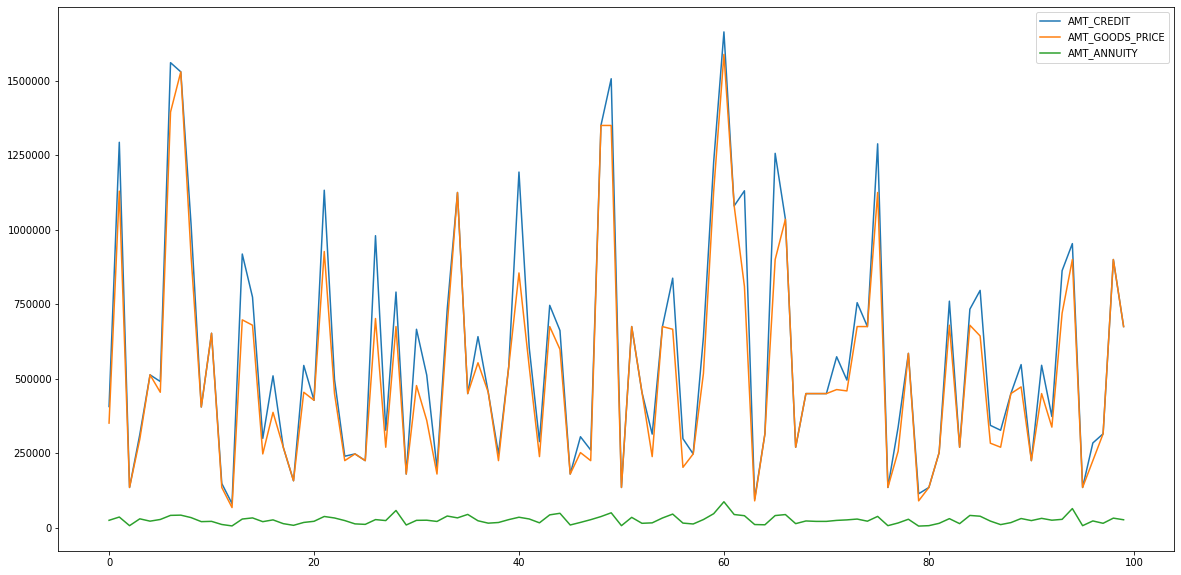

In [92]:

fig=plt.figure(figsize=(20,10))
plt.plot(app_train['AMT_CREDIT'][0:100], label='AMT_CREDIT')
plt.plot(app_train['AMT_GOODS_PRICE'][0:100], label='AMT_GOODS_PRICE')
plt.plot(app_train['AMT_ANNUITY'][0:100], label="AMT_ANNUITY")
plt.legend()
plt.show()